# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Minando-datos-de-Twitter-con-Pandas-+-Tweepy" data-toc-modified-id="Minando-datos-de-Twitter-con-Pandas-+-Tweepy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Minando datos de Twitter con Pandas + Tweepy</strong></a></div><div class="lev2 toc-item"><a href="#Importamos-nuestras-librerías" data-toc-modified-id="Importamos-nuestras-librerías-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importamos nuestras librerías</a></div><div class="lev2 toc-item"><a href="#Creamos-una-App-de-Twitter" data-toc-modified-id="Creamos-una-App-de-Twitter-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creamos una App de Twitter</a></div><div class="lev2 toc-item"><a href="#Extraemos-tweets" data-toc-modified-id="Extraemos-tweets-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Extraemos tweets</a></div><div class="lev2 toc-item"><a href="#Creamos-un-dataframe" data-toc-modified-id="Creamos-un-dataframe-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creamos un dataframe</a></div><div class="lev2 toc-item"><a href="#Añadimos-información-relevante" data-toc-modified-id="Añadimos-información-relevante-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Añadimos información relevante</a></div><div class="lev1 toc-item"><a href="#Visualización-y-estadística-básica" data-toc-modified-id="Visualización-y-estadística-básica-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Visualización y estadística básica</strong></a></div><div class="lev2 toc-item"><a href="#Promedios-y-popularidad" data-toc-modified-id="Promedios-y-popularidad-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Promedios y popularidad</a></div><div class="lev2 toc-item"><a href="#Series-de-tiempo" data-toc-modified-id="Series-de-tiempo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Series de tiempo</a></div><div class="lev2 toc-item"><a href="#Pie-charts-de-dispositivos" data-toc-modified-id="Pie-charts-de-dispositivos-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pie charts de dispositivos</a></div><div class="lev1 toc-item"><a href="#Análisis-de-sentimientos" data-toc-modified-id="Análisis-de-sentimientos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Análisis de sentimientos</strong></a></div><div class="lev2 toc-item"><a href="#Importando-textblob" data-toc-modified-id="Importando-textblob-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importando textblob</a></div><div class="lev2 toc-item"><a href="#Analizando-sentimientos" data-toc-modified-id="Analizando-sentimientos-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analizando sentimientos</a></div><div class="lev2 toc-item"><a href="#Analizando-resultados" data-toc-modified-id="Analizando-resultados-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Analizando resultados</a></div><div class="lev1 toc-item"><a href="#Referencias" data-toc-modified-id="Referencias-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Referencias</a></div>

# **Minando datos de Twitter con Pandas + Tweepy**

## Importamos nuestras librerías

**Pandas** es una biblioteca de código abierto, que proporciona estructuras de datos de alto rendimiento y fácil de usar y herramientas de análisis de datos para el lenguaje de programación Python.

**Tweepy** es una biblioteca de Python fácil de usar para acceder a la API de Twitter.

**NumPy** es el paquete fundamental para la computación científica con Python. Contiene entre otras cosas:
* Un potente objeto de matriz N-dimensional
* Sofisticadas funciones de radiodifusión
* Herramientas para integrar código C / C ++ y Fortran
* Álgebra lineal útil, transformada de Fourier y capacidades de números aleatorios

Además de sus usos científicos obvios, NumPy también puede ser utilizado como un eficiente contenedor multidimensional de datos genéricos. Se pueden definir tipos de datos arbitrarios. Esto permite a NumPy integrarse de forma transparente y rápida con una amplia variedad de bases de datos.

**Matplotlib** es una biblioteca de trazado de Python 2D que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos entre plataformas. Matplotlib se puede utilizar en scripts Python, en el shell Python e IPython, en el Jupyter Notebook, en servidores de aplicaciones web y para kits de herramientas de interfaz gráfica de usuario.

**Seaborn** es una biblioteca de visualización de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos.

In [24]:
# General:
import tweepy           # Para consumir la API de Twitter
import pandas as pd     # Para manejo de datos
import numpy as np      # Para operaciones numéricas

# Para ploteo y visualización:
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

## Creamos una App de Twitter

Para poder extraer twits para un posterior análisis, debemos acceder a nuestra cuenta de Twitter y crear una app. El sitio para poder hacer eso es [https://apps.twitter.com/](https://apps.twitter.com/).

De esta app que creamos necesitaremos actualizar nuestro script `credentials.py` con la siguiente información:
* Consumer Key (API Key)
* Consumer Secret (API Secret)
* Access Token
* Access Token Secret

Habiendo hehco esto, podemos proceder a consumir el API de Twitter. Para ello, creamos una función que nos permita autenticar nuestras llaves de acceso y consumo.

In [25]:
# Importamos nuestras llaves de acceso:
from credentials import *

# Configuración del API:
def twitter_config():
    """
    Función de utilidad para configurar el consumo del 
    API de Twitter con las llaves proporcionadas.
    """
    # Autenticar y acceder usando llaves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Regresar acceso al API:
    api = tweepy.API(auth)
    return api

## Extraemos tweets

Ahora podemos crear un extractor de datos de Twitter para un usuario en específico.

En mi caso, utilizaré a Donald Trump ([@realDonaldTrump](https://twitter.com/realDonaldTrump)) como usuario a minar.


<!-- <iframe src='https://twitter.com/realDonaldTrump' width=700 height=350></iframe> -->

In [26]:
# Creamos un objeto extractor:
extractor = twitter_config()

# Creamos una lista de tweets:
tweets = extractor.user_timeline(screen_name="RealMadrid", count=200)
print("Tweets obtenidos: {}.\n".format(len(tweets)))

# Imprimimos los primeros 5 tweets:
print("Los primeros 5 tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets obtenidos: 200.

Los primeros 5 tweets:

En 3️⃣, 2️⃣, 1️⃣... ¡𝙑𝘼𝙈𝙊𝙎!
@lukamodric10 💨
@RodrygoGoes 💨
#RMCity | #HalaMadrid https://t.co/eGSimjKo9C

⚒️⚽🌱 ¡Última sesión preparatoria antes de viajar a Villarreal!
#RMCity | #HalaMadrid https://t.co/JyoDUkBoWG

⚽📺🗣️ ¡A partir de las 17h30 CET, disfruta en nuestro canal de 
@Twitch 🎮 'THE PREVIA'!
🔴 ¡Interacción en directo y… https://t.co/YYgN8A4ix0

Comunicado Oficial: Jović.
#RealMadrid

🔴⚽ EN DIRECTO: ¡Último entrenamiento antes del partido 🆚 @VillarrealCF! #RMCity https://t.co/koptQ7wJDl



## Creamos un dataframe

Ahora tenemos información inicial para construir un `DataFrame` de pandas, para poder manipular la información de manera más sencilla.

La función `display` de Jupyter Notebook nos permite tener un ploteo más amigable, y el método `head` de un dataframe nos permite visualizar sólo los primeros 5 elementos (o el número que elementos que se le pasen como argumento).

In [27]:
# Podemos crear un dataframe como sigue:
datos = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Hacemos un display del dataframe:
display(datos.head(10))

,Tweets
0,"En 3️⃣, 2️⃣, 1️⃣... ¡𝙑𝘼𝙈𝙊𝙎!\n@lukamodric10 💨\n..."
1,⚒️⚽🌱 ¡Última sesión preparatoria antes de viaj...
2,"⚽📺🗣️ ¡A partir de las 17h30 CET, disfruta en n..."
3,Comunicado Oficial: Jović.\n#RealMadrid
4,🔴⚽ EN DIRECTO: ¡Último entrenamiento antes del...
5,"👔💬 Zidane: ""Estamos pensando en el encuentro d..."
6,🔴🎙 EN DIRECTO: ¡La rueda de prensa de Zidane p...
7,🎥🔄 En bucle una y otra vez...\n🎯 NIVEL DE PREC...
8,🆒 ¡Black Friday!\n🏝 Tus vacaciones donde sueña...
9,📌 HORARIO del DERBI ✅\n🆚 @Atleti\n🏟 Alfredo Di...


Algo interesante es la cantidad de métodos internos que tiene la estructura de un tweet en Tweepy:

In [28]:
# Imprimimos métodos internos:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


De aquí resulta interesante que, si queremos obtener datos como la fecha de creación de un tweet o el dispositivo con el que fue creado, podemos acceder a esta información con métodos que aparecen en esta lista. Un ejemplo es el siguiente:

In [29]:
# Imprimimos info del primer tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1329831879256600576
2020-11-20 17:00:01
TweetDeck
332
17
None
None
{'hashtags': [{'text': 'RMCity', 'indices': [59, 66]}, {'text': 'HalaMadrid', 'indices': [69, 80]}], 'symbols': [], 'user_mentions': [{'screen_name': 'lukamodric10', 'name': 'Luka Modrić', 'id': 3395146167, 'id_str': '3395146167', 'indices': [28, 41]}, {'screen_name': 'RodrygoGoes', 'name': 'Rodrygo Goes', 'id': 815671379202887684, 'id_str': '815671379202887684', 'indices': [44, 56]}], 'urls': [], 'media': [{'id': 1329827565402546177, 'id_str': '1329827565402546177', 'indices': [81, 104], 'media_url': 'http://pbs.twimg.com/media/EnR_IABXYAEcPnK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EnR_IABXYAEcPnK.jpg', 'url': 'https://t.co/eGSimjKo9C', 'display_url': 'pic.twitter.com/eGSimjKo9C', 'expanded_url': 'https://twitter.com/realmadrid/status/1329831879256600576/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1200, 'h': 675, 'resize': 'fit'}, 'large': {'w': 1

## Añadimos información relevante

Esta información de cada tweet puede ser agregada a nuestro dataframe:

In [30]:
# Añadimos datos relevantes:
datos['len'] = np.array([len(tweet.text) for tweet in tweets])
datos['ID']  = np.array([tweet.id for tweet in tweets])
datos['Creado'] = np.array([tweet.created_at for tweet in tweets])
datos['Fuente'] = np.array([tweet.source for tweet in tweets])
datos['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
datos['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

Reimprimendo parte de nuestro dataframe, vemos que la actualización se realiza:

In [31]:
# Hacemos un display del dataframe:
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs
0,"En 3️⃣, 2️⃣, 1️⃣... ¡𝙑𝘼𝙈𝙊𝙎!\n@lukamodric10 💨\n...",104,1329831879256600576,2020-11-20 17:00:01,TweetDeck,332,17
1,⚒️⚽🌱 ¡Última sesión preparatoria antes de viaj...,108,1329822111750365190,2020-11-20 16:21:12,Twitter Web App,1078,54
2,"⚽📺🗣️ ¡A partir de las 17h30 CET, disfruta en n...",139,1329816777585356800,2020-11-20 16:00:01,Twitter for Advertisers (legacy),615,38
3,Comunicado Oficial: Jović.\n#RealMadrid,38,1329814401638162436,2020-11-20 15:50:34,Twitter for Advertisers (legacy),3000,256
4,🔴⚽ EN DIRECTO: ¡Último entrenamiento antes del...,103,1329810601011408897,2020-11-20 15:35:28,Periscope,906,76
5,"👔💬 Zidane: ""Estamos pensando en el encuentro d...",125,1329803100052447234,2020-11-20 15:05:40,Twitter Media Studio,1195,87
6,🔴🎙 EN DIRECTO: ¡La rueda de prensa de Zidane p...,122,1329795709168566273,2020-11-20 14:36:18,Periscope,1130,81
7,🎥🔄 En bucle una y otra vez...\n🎯 NIVEL DE PREC...,114,1329786583428509697,2020-11-20 14:00:02,Twitter Media Studio,2274,141
8,🆒 ¡Black Friday!\n🏝 Tus vacaciones donde sueña...,140,1329771476547817472,2020-11-20 13:00:00,Twitter for Advertisers (legacy),783,43
9,📌 HORARIO del DERBI ✅\n🆚 @Atleti\n🏟 Alfredo Di...,138,1329760150488432642,2020-11-20 12:15:00,TweetDeck,2251,154


Muy bien, estamos listos para realizar un posterior análisis.

¡Sube el nivel!

# **Visualización y estadística básica**

## Promedios y popularidad

Primero nos interesa conocer estadísticos básicos sobre la información que extragimos, como la media de las longitudes de cada tweet, cuál fue el tweet con más favoritos, cuál fue el tweet más retweeteado, etc.

In [32]:
# Extraemos el promedio:
media = np.mean(datos['len'])

print("El promedio de caracteres en tweets: {}".format(media))

El promedio de caracteres en tweets: 108.175


In [33]:
# Extraemos el tweet con más FAVs y con más RTs:

fav_max = np.max(datos['Likes'])
rt_max  = np.max(datos['RTs'])

fav = datos[datos.Likes == fav_max].index[0]
rt  = datos[datos.RTs == rt_max].index[0]

# Max FAVs:
print("El tweet con más likes es: \n{}".format(datos['Tweets'][fav]))
print("Número de likes: {}".format(fav_max))
print("{} caracteres.\n".format(datos['len'][fav]))

# Max RTs:
print("El tweet con más retweets es: \n{}".format(datos['Tweets'][rt]))
print("Número de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(datos['len'][rt]))


El tweet con más likes es: 
©️⚽💯 ¡El capitán, @SergioRamos, alcanza la cifra de 1️⃣0️⃣0️⃣ goles con la camiseta del @RealMadrid!
#RealFootball… https://t.co/XMpTIV4Du7
Número de likes: 55686
139 caracteres.

El tweet con más retweets es: 
©️⚽💯 ¡El capitán, @SergioRamos, alcanza la cifra de 1️⃣0️⃣0️⃣ goles con la camiseta del @RealMadrid!
#RealFootball… https://t.co/XMpTIV4Du7
Número de retweets: 7654
139 caracteres.



## Series de tiempo

Dado que tenemos todo un vector de fechas de creación, podemos construir una serie de tiempo con respecto a longitudes de tweets, favoritos y retweets.

In [34]:
# Creamos series de tiempo para datos:

tlen = pd.Series(data=datos['len'].values, index=datos['Creado'])
tfav = pd.Series(data=datos['Likes'].values, index=datos['Creado'])
tret = pd.Series(data=datos['RTs'].values, index=datos['Creado'])

Visualizamos las series de tiempo en plots:

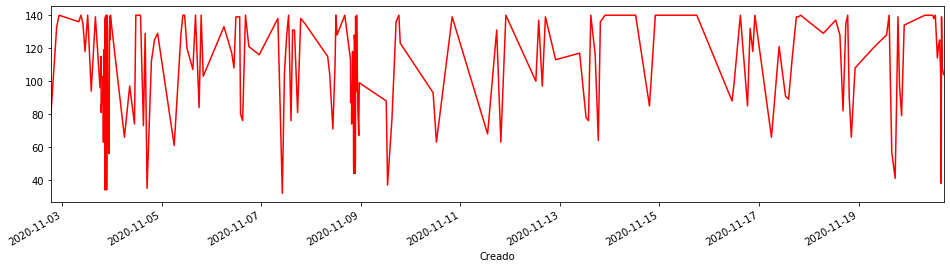

In [35]:
# Visualización de longitudes:
tlen.plot(figsize=(16,4), color='r');

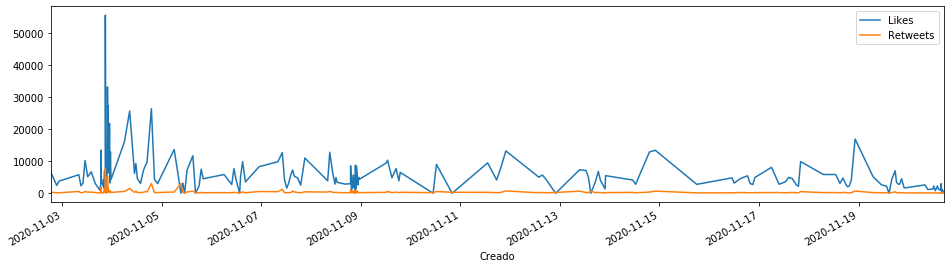

In [36]:
# Visualización de likes vs retweets:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

## Pie charts de dispositivos

Limpiamos las fuentes de creación de tweets para hacer un pie chart:

In [37]:
# Obtenemos posibles fuentes:
fuentes = []
for fuente in datos['Fuente']:
    if fuente not in fuentes:
        fuentes.append(fuente)

# Imprimimos fuentes:
print("Fuentes de creación de contenido:")
for fuente in fuentes:
    print("* {}".format(fuente))

Fuentes de creación de contenido:
* TweetDeck
* Twitter Web App
* Twitter for Advertisers (legacy)
* Periscope
* Twitter Media Studio


Contamos dispositivos y creamos un pie chart:

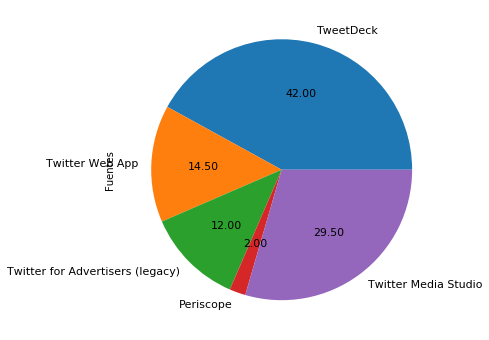

In [38]:
# Creamos un vector mapeado a etiquetas:
percent = np.zeros(len(fuentes))

for fuente in datos['Fuente']:
    for index in range(len(fuentes)):
        if fuente == fuentes[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=fuentes, name='Fuentes')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

Ya tenemos estadístigas y gráficas muy básicas sobre los datos obtenidos.

¿Y si hacemos análisis de sentimientos?

# **Análisis de sentimientos**

## Importando textblob

**TextBlob** es una biblioteca de Python (2 y 3) para procesar datos de texto. Proporciona una API sencilla para ahondar en las tareas comunes de procesamiento del lenguaje natural (PNL), como el etiquetado de parte del habla, la extracción de frase nominal, el análisis de sentimientos, la clasificación, la traducción y mucho más.

In [39]:
from textblob import TextBlob
import re

def limpia_tweet(tweet):
    '''
    Función de utilidad para limpiar el texto de un tweet removiendo 
    enlaces y caracteres especiales usando regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analiza_sentimiento(tweet):
    '''
    Función de utilidad para clasificar el sentimiento del tweet
    proporcionado utilizando textblob
    '''
    analysis = TextBlob(limpia_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

## Analizando sentimientos

Con estas funciones podemos realizar un análisis de sentimientos de tweets de nuestro dataframe.

In [40]:
# Creamos columna de resultados del análisis
datos['AdS'] = np.array([ analiza_sentimiento(tweet) for tweet in datos['Tweets'] ])

# Hacemos display de los sentimientos:
display(datos.head(10))

,Tweets,len,ID,Creado,Fuente,Likes,RTs,AdS
0,"En 3️⃣, 2️⃣, 1️⃣... ¡𝙑𝘼𝙈𝙊𝙎!\n@lukamodric10 💨\n...",104,1329831879256600576,2020-11-20 17:00:01,TweetDeck,332,17,0
1,⚒️⚽🌱 ¡Última sesión preparatoria antes de viaj...,108,1329822111750365190,2020-11-20 16:21:12,Twitter Web App,1078,54,0
2,"⚽📺🗣️ ¡A partir de las 17h30 CET, disfruta en n...",139,1329816777585356800,2020-11-20 16:00:01,Twitter for Advertisers (legacy),615,38,0
3,Comunicado Oficial: Jović.\n#RealMadrid,38,1329814401638162436,2020-11-20 15:50:34,Twitter for Advertisers (legacy),3000,256,0
4,🔴⚽ EN DIRECTO: ¡Último entrenamiento antes del...,103,1329810601011408897,2020-11-20 15:35:28,Periscope,906,76,0
5,"👔💬 Zidane: ""Estamos pensando en el encuentro d...",125,1329803100052447234,2020-11-20 15:05:40,Twitter Media Studio,1195,87,0
6,🔴🎙 EN DIRECTO: ¡La rueda de prensa de Zidane p...,122,1329795709168566273,2020-11-20 14:36:18,Periscope,1130,81,0
7,🎥🔄 En bucle una y otra vez...\n🎯 NIVEL DE PREC...,114,1329786583428509697,2020-11-20 14:00:02,Twitter Media Studio,2274,141,0
8,🆒 ¡Black Friday!\n🏝 Tus vacaciones donde sueña...,140,1329771476547817472,2020-11-20 13:00:00,Twitter for Advertisers (legacy),783,43,-1
9,📌 HORARIO del DERBI ✅\n🆚 @Atleti\n🏟 Alfredo Di...,138,1329760150488432642,2020-11-20 12:15:00,TweetDeck,2251,154,0


## Analizando resultados

Podemos construir una lista con todos los tweets clasificados, así como reportar porcentajes del análisis realizado.

In [41]:
# Construimos listas con tweets clasificados:

tweets_positivos = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] > 0]
tweets_neutros   = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] == 0]
tweets_negativos = [ tweet for index, tweet in enumerate(datos['Tweets']) if datos['AdS'][index] < 0]

In [42]:
# Imprimimos porcentajes:

print("Porcentaje de tweets positivos: {}%".format(len(tweets_positivos)*100/len(datos['Tweets'])))
print("Porcentaje de tweets neutros: {}%".format(len(tweets_neutros)*100/len(datos['Tweets'])))
print("Porcentaje de tweets negativos: {}%".format(len(tweets_negativos)*100/len(datos['Tweets'])))

Porcentaje de tweets positivos: 3.0%
Porcentaje de tweets neutros: 96.5%
Porcentaje de tweets negativos: 0.5%


# Referencias

1. [Documentación oficial de Tweepy](http://tweepy.readthedocs.io/en/v3.5.0/).
2. [Documentación oficial de NumPy](https://docs.scipy.org/doc/numpy-dev/index.html).
3. [Tutorial de NumPy](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html).
4. [Tutorial de Pandas](https://pandas.pydata.org/pandas-docs/stable/tutorials.html).
5. [Documentación oficial de Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html).
6. [Documentación oficial de Matplotlib](http://matplotlib.org/index.html).
7. [Tutorial de Pyplot](http://matplotlib.org/users/pyplot_tutorial.html).
8. [Sitio oficial de Seaborn](https://seaborn.pydata.org/).
9. [Documentación oficial de TextBlob](https://textblob.readthedocs.io/en/dev/).
10. [Creación de clasificadores con TextBlob](https://textblob.readthedocs.io/en/dev/classifiers.html).

In [45]:
for tweet in tweets_positivos[:5]:
    print(tweet)
    print()

RT @Liberbank: BONO DE 25€ PARA COMPRAS, CON LA TARJETA DE DÉBITO #RealMadrid.
Contrata la tarjeta de débito Real Madrid entre el 19/11 y e…

RT @realmadridfem: 📸 ¡La primera foto oficial de nuestra historia!
🤩 History made! Our first official team photo.
#HalaMadrid | #RealMadrid…

🔥 El Real Madrid pierde en Mestalla. 
#RMLiga | #ValenciaRealMadrid

🔥⚽🎥 EN DIRECT🔴: ¡El calentamiento previo al #ValenciaRealMadrid! #RMLiga https://t.co/lvmDWYFjNJ

⚽👏 ¡VAMOS REAL! 
🔜 @valenciacf
#RMCity | #HalaMadrid https://t.co/Jgj3FKDhIe

